In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Population Mean Glucose: 120.89
Sample Mean Glucose: 116.64
Population Max Glucose: 199
Sample Max Glucose: 183


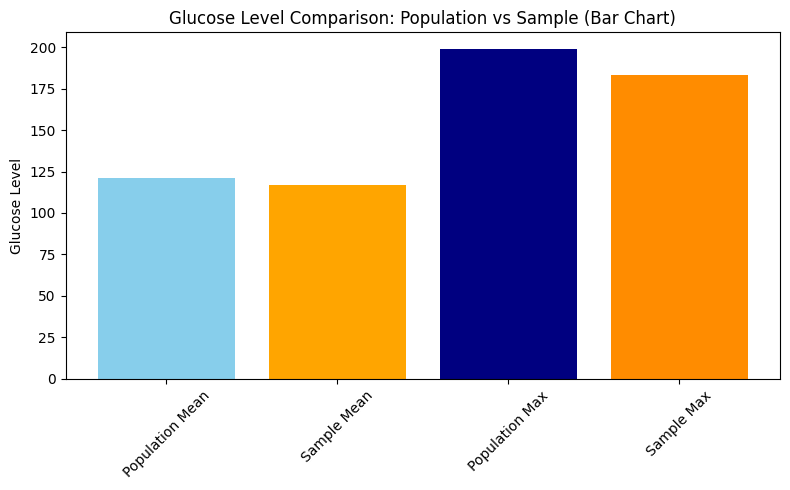

In [6]:
# Set seed and take random sample of 25
np.random.seed(42)
sample_df = df.sample(n=25)

# Calculate mean and max for population and sample
population_mean = df['Glucose'].mean()
population_max = df['Glucose'].max()
sample_mean = sample_df['Glucose'].mean()
sample_max = sample_df['Glucose'].max()

# Display statistics
print("Population Mean Glucose:", round(population_mean, 2))
print("Sample Mean Glucose:", round(sample_mean, 2))
print("Population Max Glucose:", population_max)
print("Sample Max Glucose:", sample_max)

# Bar chart comparison
plt.figure(figsize=(8, 5))
bar_data = {
    'Population Mean': population_mean,
    'Sample Mean': sample_mean,
    'Population Max': population_max,
    'Sample Max': sample_max
}
plt.bar(bar_data.keys(), bar_data.values(), color=['skyblue', 'orange', 'navy', 'darkorange'])
plt.ylabel('Glucose Level')
plt.title('Glucose Level Comparison: Population vs Sample (Bar Chart)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Population 98th Percentile BMI: 47.53
Sample 98th Percentile BMI: 40.25


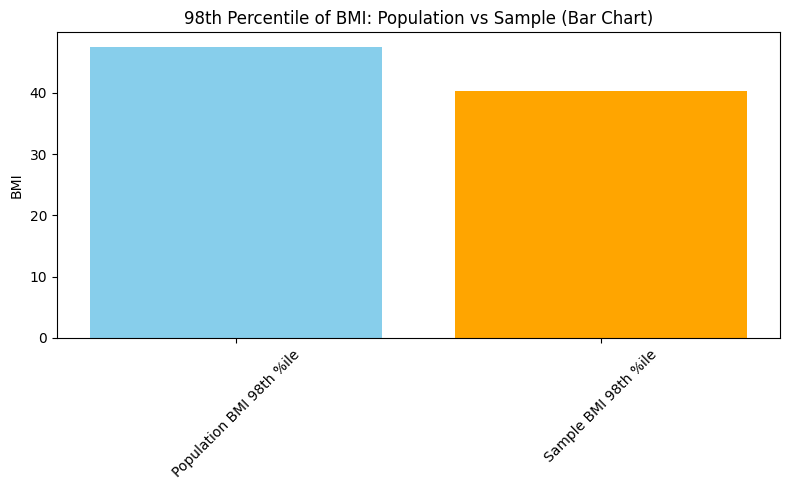

In [7]:
# Set seed and sample 25 observations
np.random.seed(42)
sample_df = df.sample(n=25)

# Compute 98th percentile of BMI
population_percentile_98 = np.percentile(df['BMI'], 98)
sample_percentile_98 = np.percentile(sample_df['BMI'], 98)

# Print values
print("Population 98th Percentile BMI:", round(population_percentile_98, 2))
print("Sample 98th Percentile BMI:", round(sample_percentile_98, 2))

# Bar chart comparison
plt.figure(figsize=(8, 5))
bar_data = {
    'Population BMI 98th %ile': population_percentile_98,
    'Sample BMI 98th %ile': sample_percentile_98
}
plt.bar(bar_data.keys(), bar_data.values(), color=['skyblue', 'orange'])
plt.ylabel('BMI')
plt.title('98th Percentile of BMI: Population vs Sample (Bar Chart)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Population Mean: 69.11
Bootstrap Mean: 69.18
Population Std Dev: 19.36
Bootstrap Std Dev: 19.07
Population 98th %ile: 99.32
Bootstrap 98th %ile: 97.9


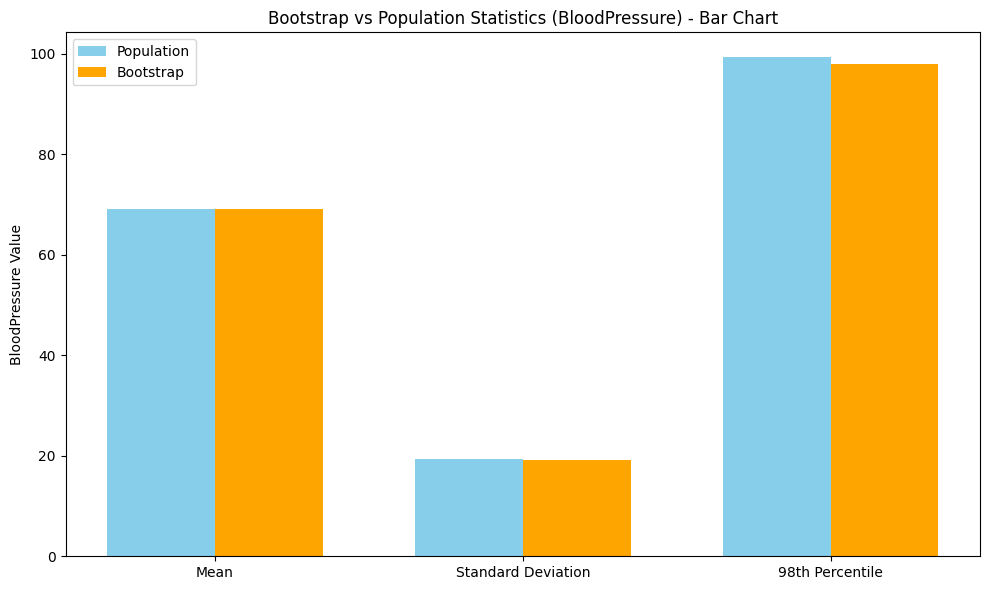

In [10]:
# Population statistics
pop_mean = df['BloodPressure'].mean()
pop_std = df['BloodPressure'].std()
pop_percentile = np.percentile(df['BloodPressure'], 98)

# Bootstrap setup
np.random.seed(42)
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []

for _ in range(500):
    sample = df['BloodPressure'].sample(n=150, replace=True)
    bootstrap_means.append(sample.mean())
    bootstrap_stds.append(sample.std())
    bootstrap_percentiles.append(np.percentile(sample, 98))

# Bootstrap average statistics
boot_mean = np.mean(bootstrap_means)
boot_std = np.mean(bootstrap_stds)
boot_percentile = np.mean(bootstrap_percentiles)

# Display statistics
print("Population Mean:", round(pop_mean, 2))
print("Bootstrap Mean:", round(boot_mean, 2))
print("Population Std Dev:", round(pop_std, 2))
print("Bootstrap Std Dev:", round(boot_std, 2))
print("Population 98th %ile:", round(pop_percentile, 2))
print("Bootstrap 98th %ile:", round(boot_percentile, 2))

# Bar chart comparison
labels = ['Mean', 'Standard Deviation', '98th Percentile']
population_vals = [pop_mean, pop_std, pop_percentile]
bootstrap_vals = [boot_mean, boot_std, boot_percentile]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, population_vals, width, label='Population', color='skyblue')
plt.bar(x + width/2, bootstrap_vals, width, label='Bootstrap', color='orange')
plt.ylabel('BloodPressure Value')
plt.title('Bootstrap vs Population Statistics (BloodPressure) - Bar Chart')
plt.xticks(x, labels)
plt.legend()
plt.tight_layout()
plt.show()

# Report
Comparison of the bar charts indicates that the Bootstrap estimates of the mean, variance, and 98-th percentile of BloodPressure are very close to the true population values. This high degree of correlation shows that the bootstrap resampling approach is an accurate method for estimating important population statistics from multiple sampling.